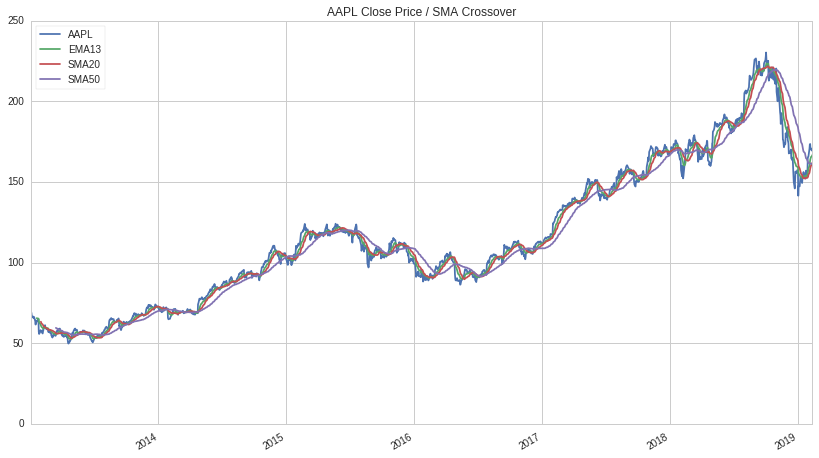

In [27]:
# Research environment functions
from quantopian.research import prices, symbols
import talib


# Pandas library: https://pandas.pydata.org/
import pandas as pd

# Query historical pricing data for AAPL
aapl_close = prices(
    assets=symbols('AAPL'),
    start='2013-01-01',
    end='2019-02-12',
)

# Compute 20 and 50 day moving averages on
# AAPL's pricing data
aapl_sma20 = aapl_close.rolling(20).mean()
aapl_sma50 = aapl_close.rolling(50).mean()

aapl_ema_5 = talib.EMA(aapl_close,timeperiod=5)
aapl_ema_13 = talib.EMA(aapl_close,timeperiod=13)
aapl_ema_63 = talib.EMA(aapl_close,timeperiod=63)

aapl_rsi_14 = talib.RSI(aapl_close,timeperiod=14)
aapl_rsi_20 = talib.RSI(aapl_close,timeperiod=20)
aapl_rsi_63 = talib.RSI(aapl_close,timeperiod=63)

df1 = pd.DataFrame({   
    'AAPL': aapl_close,
    'SMA20': aapl_sma20,
    'SMA50': aapl_sma50,
    'EMA5': aapl_ema_5,
    'EMA13': aapl_ema_13,
    'EMA63': aapl_ema_63,
    'RSI14': aapl_rsi_14,
    'RSI20': aapl_rsi_20,
    'RSI63': aapl_rsi_63,
})


# Combine results into a pandas DataFrame and plot
pd.DataFrame({   
    'AAPL': aapl_close,
    'SMA20': aapl_sma20,
    'SMA50': aapl_sma50,
    'EMA13': aapl_ema_13,
}).plot(
    title='AAPL Close Price / SMA Crossover'
);

In [28]:
df1.tail()

,AAPL,EMA13,EMA5,EMA63,RSI14,RSI20,RSI63,SMA20,SMA50
2019-02-06 00:00:00+00:00,173.536,163.573299,169.702727,169.456076,66.998465,59.212908,48.500425,158.15940,161.41184
2019-02-07 00:00:00+00:00,170.260,164.528542,169.888484,169.481199,61.408999,55.922618,47.669991,159.03965,161.38596
2019-02-08 00:00:00+00:00,170.500,165.381607,170.092323,169.513036,61.661344,56.110688,47.736606,159.90750,161.31828
2019-02-11 00:00:00+00:00,169.450,165.962806,169.878215,169.511066,59.818425,55.029370,47.467979,160.79850,161.23716
2019-02-12 00:00:00+00:00,170.890,166.666691,170.215477,169.554158,61.517132,56.246591,47.876724,161.87550,161.05122


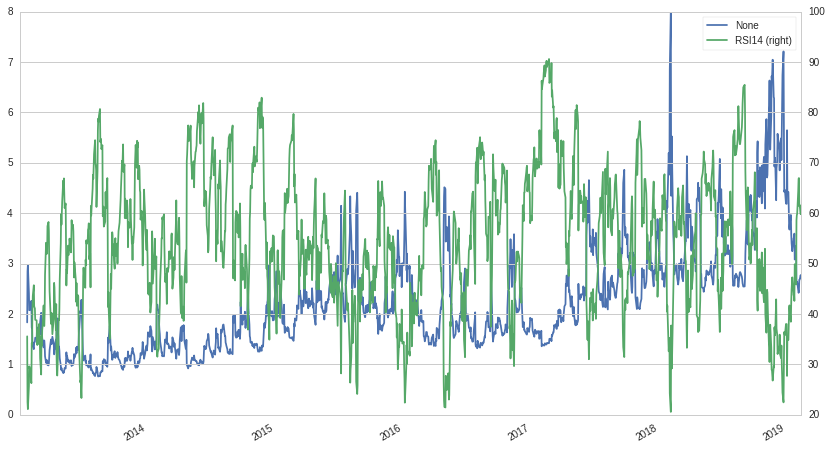

In [29]:
(df1['EMA13'] / df1['RSI14']).plot(legend=True)
df1['RSI14'].plot(secondary_y=True,legend=True)

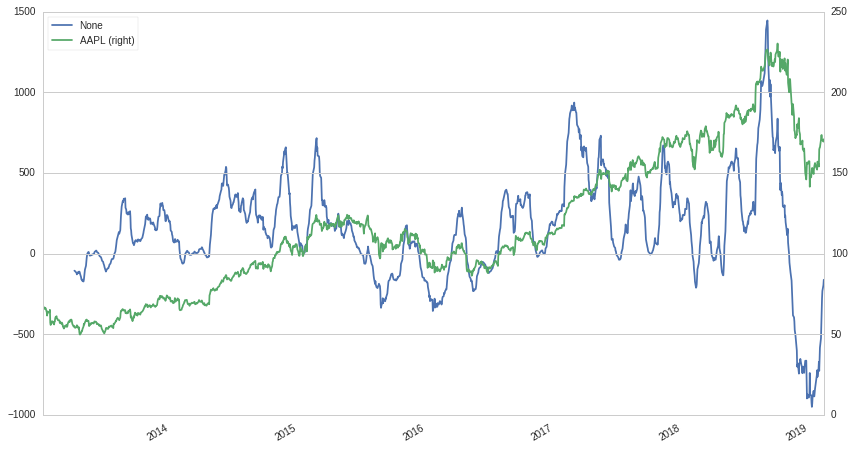

In [33]:
((df1['EMA13'] - df1['EMA63']) * df1['RSI20']).plot(legend=True)
#df1['RSI14'].plot(secondary_y=True,legend=True)
df1['AAPL'].plot(secondary_y=True,legend=True)

In [ ]:
((df1['EMA13'] - df1['SMA50']) * df1['RSI14']).plot(legend=True)
#df1['RSI14'].plot(secondary_y=True,legend=True)
df1['AAPL'].plot(secondary_y=True,legend=True)

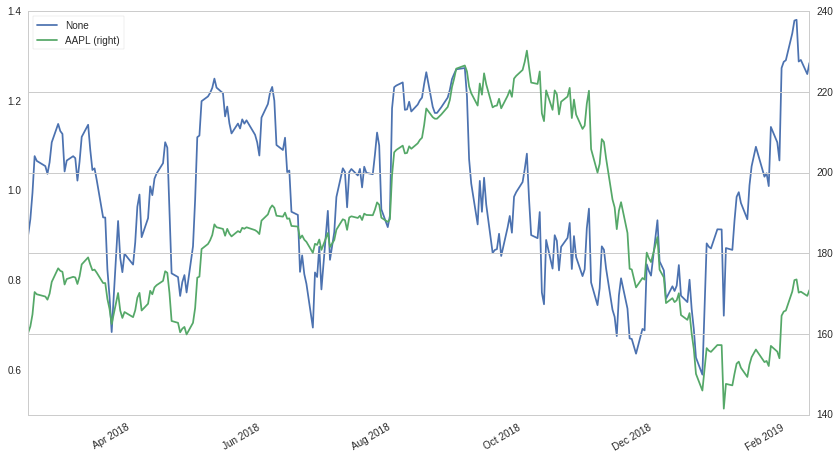

In [36]:
#df1['RSI63'].plot(legend=True)
#df1['RSI14'].plot(legend=True,secondary_y=True)

RSI_factor = (df1['RSI14'] / df1['RSI63'])
RSI_factor[-252:].plot(legend=True)
df1['AAPL'][-252:].plot(secondary_y=True,legend=True)